<a href="https://colab.research.google.com/github/mbaroja/TFM/blob/code/Agrupacion_jerarquica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples


In [40]:
# Carga de los datos a un dataframe y comprobar dimensionalidad

#df=pd.read_csv("https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned.csv",delimiter=";")
#df=pd.read_csv("https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned_without_avgcolumns.csv",delimiter=";")
df=pd.read_csv("https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned_only_avgcolumns.csv",delimiter=";")

df.shape


(133, 29)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AREA        133 non-null    object 
 1   EQUIPO      133 non-null    object 
 2   EDAD        133 non-null    object 
 3   GENERO      119 non-null    object 
 4   V_media     133 non-null    float64
 5   SA_media    133 non-null    float64
 6   SI_media    133 non-null    float64
 7   SP_media    133 non-null    float64
 8   SF_media    133 non-null    float64
 9   CL_media    133 non-null    float64
 10  CH_media    133 non-null    float64
 11  CE_media    133 non-null    float64
 12  CB_media    133 non-null    float64
 13  CD_media    133 non-null    float64
 14  CJ_media    133 non-null    float64
 15  CC_media    133 non-null    float64
 16  CI_media    133 non-null    float64
 17  LS_media    133 non-null    float64
 18  LA_media    133 non-null    float64
 19  LV_media    133 non-null    f

**Preprocesado de los datos de entrada**

In [42]:
#Preprocesado de datos ya que los algoritmos requieren datos numéricos para calcular la matriz de afinidad y realizar el clustering

#identificar las columnas que contienen valores de texto en el conjunto de datos
data_text = df.select_dtypes(include='object')
# aplicar la codificación one-hot utilizando el método get_dummies de Pandas para convertir esas columnas en columnas numéricas
data_encoded = pd.get_dummies(data_text)

In [43]:
#una vez que preprocesados los datos, combinar las columnas numéricas procesadas con el resto del conjunto de datos.
data_numeric = df.select_dtypes(exclude='object')
data_processed = pd.concat([data_numeric, data_encoded], axis=1)

In [44]:
data_processed

,V_media,SA_media,SI_media,SP_media,SF_media,CL_media,CH_media,CE_media,CB_media,CD_media,...,EQUIPO_qmsudmubli,EQUIPO_rflidbinih,EDAD_ijawrgtfuz,EDAD_omygfsbzgq,EDAD_pqgwhrmfdu,EDAD_qmsudmubli,EDAD_vjekcogdhn,GENERO_Femenino,GENERO_Masculino,GENERO_No binario
0,4.333333,5.000000,4.666667,3.000000,4.000000,5.000000,4.000000,4.333333,3.666667,5.000000,...,0,0,0,0,1,0,0,0,1,0
1,4.000000,5.000000,5.000000,2.000000,4.666667,5.000000,5.333333,6.000000,4.333333,4.000000,...,0,0,0,0,1,0,0,0,1,0
2,4.666667,4.000000,4.666667,3.000000,4.333333,5.000000,5.000000,5.000000,3.333333,2.333333,...,0,0,0,1,0,0,0,1,0,0
3,5.000000,5.000000,5.000000,4.000000,4.000000,4.666667,4.666667,4.666667,4.666667,3.666667,...,0,0,0,0,1,0,0,0,1,0
4,2.000000,1.000000,4.666667,1.000000,1.000000,1.000000,1.333333,2.000000,4.000000,5.000000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,4.000000,4.666667,3.333333,2.000000,2.000000,5.000000,4.000000,4.333333,3.000000,2.333333,...,1,0,0,0,0,1,0,0,0,0
129,3.000000,4.333333,4.333333,1.333333,2.000000,4.666667,2.000000,3.333333,3.333333,4.333333,...,1,0,0,0,0,1,0,0,0,0
130,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.666667,3.000000,3.666667,3.000000,3.000000,...,1,0,0,0,0,1,0,0,0,0
131,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1,0,0,0,0,1,0,0,0,0


In [45]:
#Crear una matriz de características (feature matrix) a partir de los datos:
X = data_processed.values

In [46]:
# Crea una instancia del algoritmo de agrupación jerárquica AgglomerativeClustering
modelAC = AgglomerativeClustering(n_clusters=9, metric='euclidean', linkage='ward')
clustersAC=modelAC.fit_predict(X)

In [47]:
clustersAC

array([1, 1, 1, 4, 0, 4, 1, 4, 1, 1, 1, 7, 7, 8, 4, 1, 1, 7, 1, 1, 3, 0,
       0, 1, 4, 0, 1, 0, 4, 1, 8, 4, 1, 2, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 3, 1, 1, 4, 1, 0, 2, 1, 1, 1, 1, 8, 2, 1, 4, 1, 1,
       1, 0, 7, 1, 4, 1, 6, 5, 1, 1, 1, 0, 1, 1, 1, 0, 4, 0, 4, 0, 1, 0,
       1, 1, 4, 4, 0, 1, 1, 1, 4, 0, 0, 1, 0, 0, 1, 0, 1, 4, 0, 4, 0, 1,
       1, 4, 1, 4, 0, 1, 4, 4, 0, 4, 1, 4, 1, 4, 0, 1, 1, 4, 4, 0, 5, 1,
       1])

In [48]:

# Obtén las etiquetas de los clusteres asignados a cada fila
etiquetas = modelAC.labels_

# Agrega las etiquetas al DataFrame original
data_processed['Cluster'] = etiquetas

df['Cluster']= etiquetas

data_processed.to_csv("AgglomerativeClustering_withclusters.csv",sep=";",index=False)

# Muestra los resultados
print(df.head(10))

         AREA      EQUIPO        EDAD     GENERO   V_media  SA_media  \
0  vwbmgqjqnq  nnojgjufpu  pqgwhrmfdu  Masculino  4.333333  5.000000   
1  vwbmgqjqnq  nnojgjufpu  pqgwhrmfdu  Masculino  4.000000  5.000000   
2  vwbmgqjqnq  nnojgjufpu  omygfsbzgq   Femenino  4.666667  4.000000   
3  vwbmgqjqnq  nnojgjufpu  pqgwhrmfdu  Masculino  5.000000  5.000000   
4  vwbmgqjqnq  nnojgjufpu  pqgwhrmfdu  Masculino  2.000000  1.000000   
5  vwbmgqjqnq  nnojgjufpu  pqgwhrmfdu   Femenino  4.666667  4.666667   
6  vwbmgqjqnq  nnojgjufpu  omygfsbzgq  Masculino  4.666667  4.333333   
7  vwbmgqjqnq  nnojgjufpu  omygfsbzgq  Masculino -1.000000  4.666667   
8  vwbmgqjqnq  nnojgjufpu  omygfsbzgq  Masculino  4.000000  4.666667   
9  vwbmgqjqnq  nnojgjufpu  omygfsbzgq  Masculino  5.000000  5.000000   

   SI_media  SP_media  SF_media  CL_media  ...  LG_media  RET_media  PS_media  \
0  4.666667  3.000000  4.000000  5.000000  ...  5.000000   3.666667  4.333333   
1  5.000000  2.000000  4.666667  5.000000  ..

In [49]:
num_features=data_processed.shape[1]
num_features

46

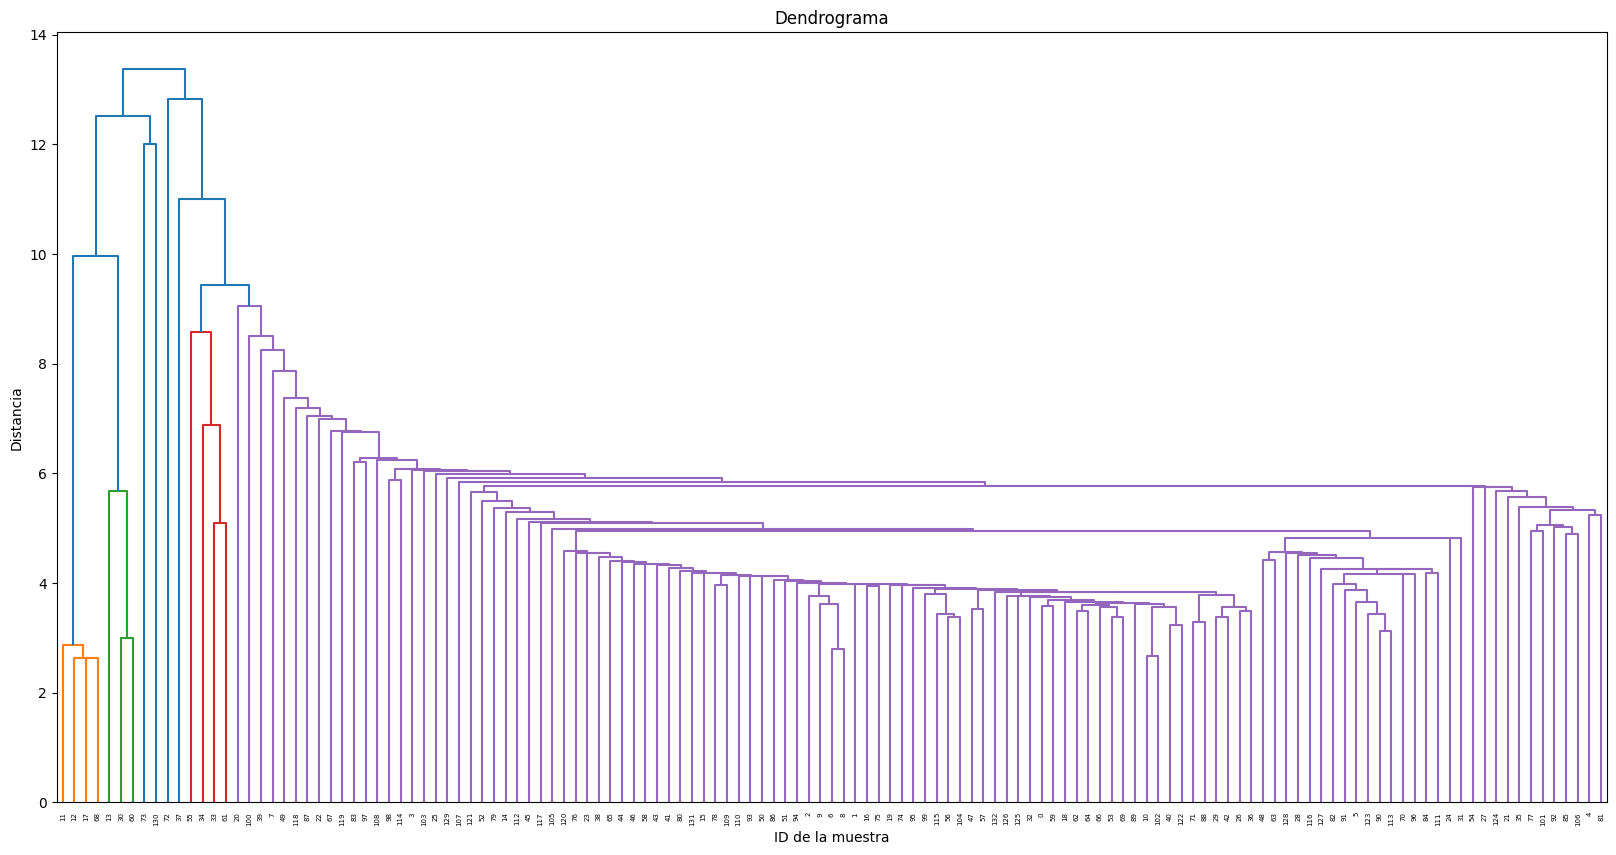

In [50]:
# Calcular la matriz de enlace
linkage_matrix = linkage(data_processed, method='single')

# Mostrar el dendrograma
plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix)

plt.title('Dendrograma')
plt.xlabel('ID de la muestra')
plt.ylabel('Distancia')

plt.show()


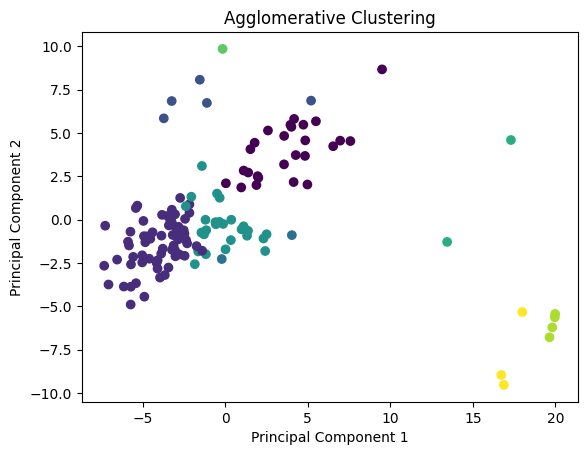

In [51]:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data_processed)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Agglomerative Clustering')
    plt.show()




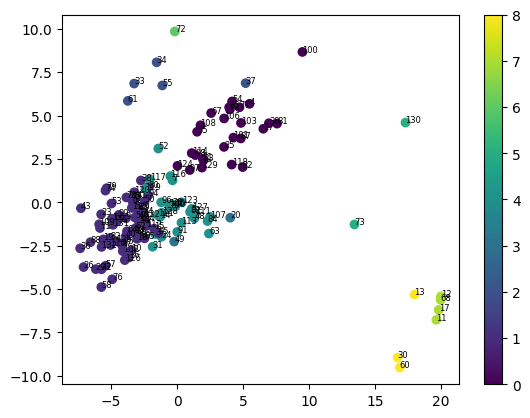

In [52]:
# X_pca[:, 0] son los valores en el eje x

# X_pca[:, 1] son los valores en el eje y

# labels1 son las etiquetas de los grupos

# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas)


# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(etiquetas):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]),size=6)


# Muestra el gráfico
plt.show()

In [53]:
# Aplicar PCA al conjunto de datos
pca = PCA()
pca.fit(data_processed)

# Obtener las componentes principales y su varianza explicada
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster
important_attributes = []
for cluster in range(modelAC.n_clusters):
    cluster_indices = np.where(etiquetas == cluster)[0]
    cluster_data = data_processed.iloc[cluster_indices]
    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)
    important_attributes.append(np.argsort(-np.abs(cluster_scores)))

# Nombres de los campos
column_names = data_processed.columns.tolist()

# Imprimir los atributos más importantes por clúster
for cluster, attributes in enumerate(important_attributes):
    print(f"Cluster {cluster}:" )
    for attribute in attributes[:7]:  # Mostrar los 7 atributos más importantes
        attribute_name = column_names[attribute]
        attribute_mean = np.mean(data_processed.iloc[np.where(etiquetas == cluster)[0], attribute])
        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")



Cluster 0:
- Atributo n. 1: V_media (Media: 2.8974358974358974)
- Atributo n. 3: SI_media (Media: 3.2179487179487176)
- Atributo n. 6: CL_media (Media: 2.1538461538461537)
- Atributo n. 5: SF_media (Media: 1.6538461538461537)
- Atributo n. 15: LA_media (Media: 1.8538461538461537)
- Atributo n. 8: CE_media (Media: 2.3076923076923075)
- Atributo n. 7: CH_media (Media: 1.7692307692307692)
Cluster 1:
- Atributo n. 1: V_media (Media: 4.603174603174602)
- Atributo n. 2: SA_media (Media: 4.9153439153439145)
- Atributo n. 6: CL_media (Media: 4.65079365079365)
- Atributo n. 5: SF_media (Media: 4.494708994708994)
- Atributo n. 3: SI_media (Media: 4.804232804232805)
- Atributo n. 8: CE_media (Media: 4.6878306878306875)
- Atributo n. 15: LA_media (Media: 4.955555555555557)
Cluster 2:
- Atributo n. 1: V_media (Media: 4.666666666666667)
- Atributo n. 6: CL_media (Media: 4.799999999999999)
- Atributo n. 4: SP_media (Media: -1.0)
- Atributo n. 2: SA_media (Media: -1.0)
- Atributo n. 3: SI_media (Media

In [54]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, etiquetas)
print(f"Índice de Silueta Promedio: {silhouette_avg}")

Índice de Silueta Promedio: 0.24619080484619188


In [55]:
# Calcular el índice de silueta para cada muestra
silhouette_values = silhouette_samples(data_processed, etiquetas)

# Calcular el índice de silueta individual promedio para cada clúster
cluster_indices = sorted(set(etiquetas))
for cluster_idx in cluster_indices:
    # Obtener las muestras pertenecientes al clúster actual
    cluster_samples = silhouette_values[etiquetas == cluster_idx]
    cluster_avg_silhouette = cluster_samples.mean()
    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.19748238534799092
Índice de Silueta del Clúster 1: 0.2784714876143071
Índice de Silueta del Clúster 2: 0.23959287644499877
Índice de Silueta del Clúster 3: 0.1581043730084164
Índice de Silueta del Clúster 4: 0.144032408190735
Índice de Silueta del Clúster 5: 0.12673251935959132
Índice de Silueta del Clúster 6: 0.0
Índice de Silueta del Clúster 7: 0.7201518854367588
Índice de Silueta del Clúster 8: 0.5093368586455053


In [56]:
#modelFA=FeatureAgglomeration(n_clusters=5)
#modelFA